# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 2. Load the Dataset

In [3]:
# Load dataset
df = pd.read_csv('/content/House Price Prediction Dataset.csv')

In [4]:
# Display first few rows
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


# 3. Explore and Clean the Data

In [5]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [6]:
# Check for missing values
df.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

# 4. Correlation Analysis

In [9]:
# Correlation matrix
df.select_dtypes(include=['number']).corr()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
Id,1.000000,-0.012966,-0.016393,-0.025433,-0.002025,0.008840,-0.025643
Area,-0.012966,1.000000,0.047523,0.021881,0.017749,-0.011609,0.001542
Bedrooms,-0.016393,0.047523,1.000000,-0.011990,0.010435,-0.014125,-0.003471
Bathrooms,-0.025433,0.021881,-0.011990,1.000000,0.029089,-0.000839,-0.015737
Floors,-0.002025,0.017749,0.010435,0.029089,1.000000,-0.006474,0.055890
YearBuilt,0.008840,-0.011609,-0.014125,-0.000839,-0.006474,1.000000,0.004845
Price,-0.025643,0.001542,-0.003471,-0.015737,0.055890,0.004845,1.000000


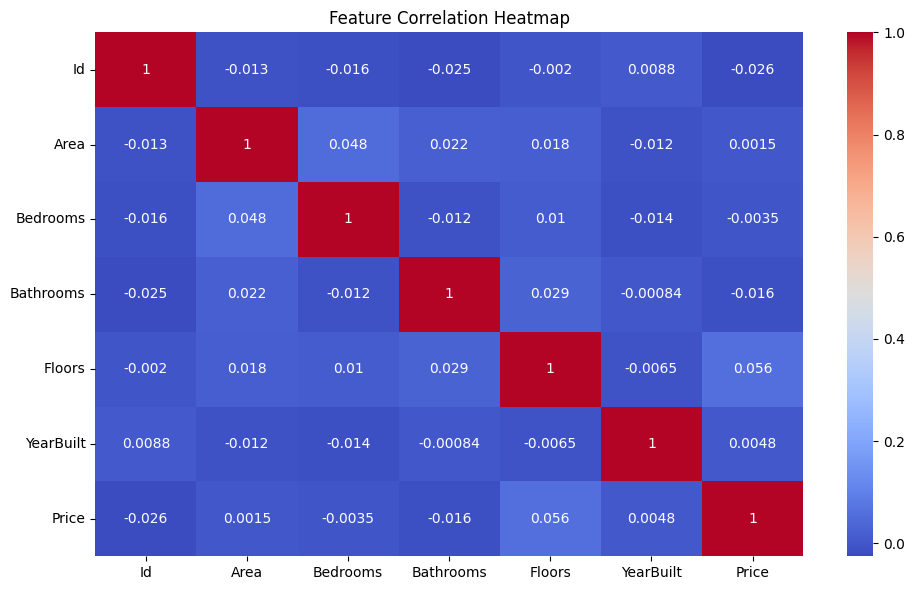

In [11]:
# Visualize correlation matrix of numeric features only
plt.figure(figsize=(10, 6))
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# 5. Prepare Features and Target

In [12]:
# Select input features and target
X = df[['Area', 'Bedrooms', 'Bathrooms']]
y = df['Price']

# 6. Feature Scaling

In [13]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Train-Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 8. Train Linear Regression Model

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 9. Predict and Evaluate

In [16]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Evaluation:
Mean Squared Error (MSE): 78440549944.81
Root Mean Squared Error (RMSE): 280072.40
R² Score: -0.01


# 10. Visualize Actual vs Predicted Prices

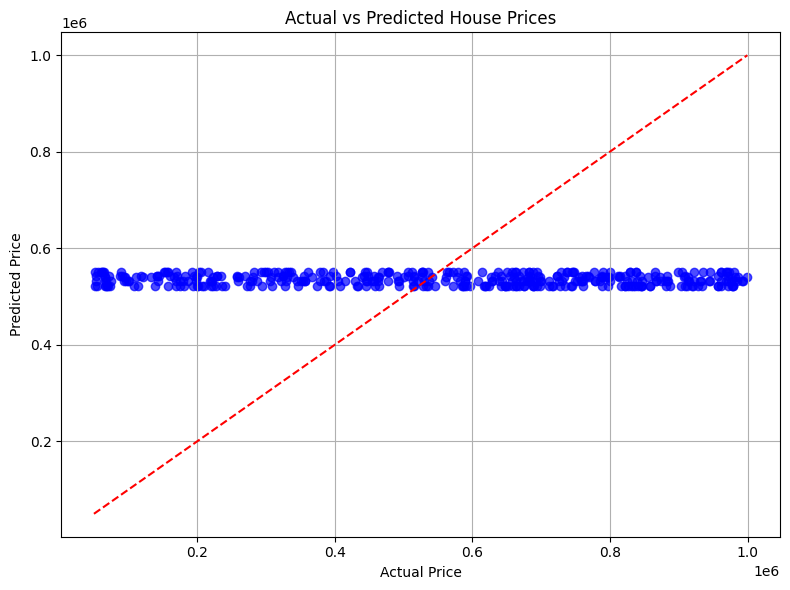

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Visualize Residuals

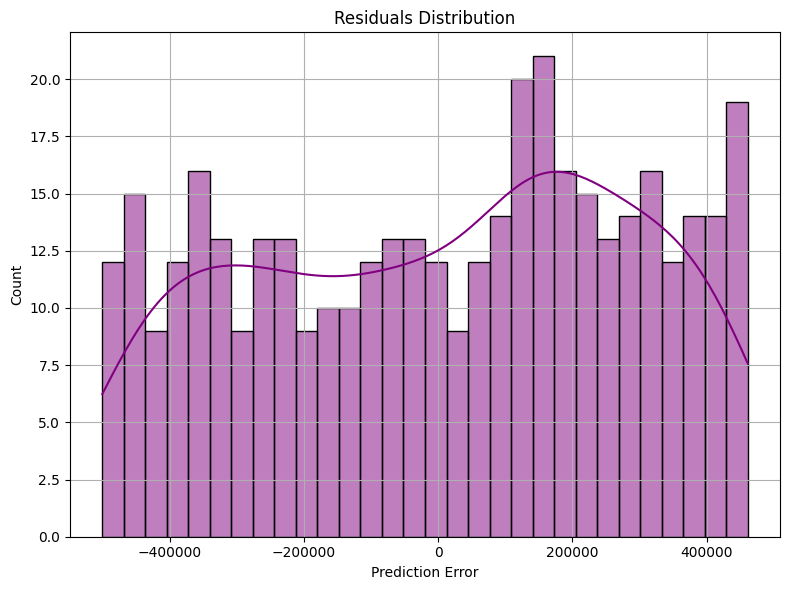

In [18]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.grid(True)
plt.tight_layout()
plt.show()